In [40]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.proportion as sm_proportion

In [41]:
#Reading in the data set
df= pd.read_csv(r"C:\Users\16479\Downloads\experiment_dataset.csv")
df.set_index('Unnamed: 0', inplace=True)
df

,Age,Location,Device,Variant,Time Spent,CTR
Unnamed: 0,,,,,,
0,62,Location2,Device2,Control,13.928669,0.084776
1,18,Location1,Device1,Variant B,11.310518,0.096859
2,21,Location2,Device1,Variant B,24.842100,0.097630
3,21,Location1,Device3,Variant B,20.061300,0.109783
4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...
995,39,Location2,Device2,Variant B,17.252030,0.092211
996,38,Location3,Device2,Control,30.075898,0.078151
997,60,Location2,Device3,Control,31.929223,0.125213


In [42]:
#Initial look through for data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1000 non-null   int64  
 1   Location    1000 non-null   object 
 2   Device      1000 non-null   object 
 3   Variant     1000 non-null   object 
 4   Time Spent  1000 non-null   float64
 5   CTR         1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 54.7+ KB


In [43]:
df.describe()

,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000
mean,40.715000,22.713345,0.109145
std,13.655557,5.479292,0.022366
min,18.000000,7.114806,0.012975
25%,28.000000,19.216608,0.094286
50%,41.000000,22.506707,0.108944
75%,53.000000,26.255950,0.124238
max,64.000000,39.395770,0.172728


In [44]:
#Calculating the mean across variants
df.groupby('Variant')[['CTR','Time Spent']].mean()

,CTR,Time Spent
Variant,,
Control,0.098554,20.070781
Variant A,0.120269,24.805547
Variant B,0.108933,23.343783


In [45]:
# Testing for p value across Location and time spent
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [46]:
# Testing for p value across Location and CTR
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


In [47]:
#Similar tests for Devices
dev_1 = df[df['Device'] == 'Device1']['Time Spent']
dev_2 = df[df['Device'] == 'Device2']['Time Spent']
dev_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(dev_1, dev_2, dev_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


In [48]:
dev_1 = df[df['Device'] == 'Device1']['CTR']
dev_2 = df[df['Device'] == 'Device2']['CTR']
dev_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(dev_1, dev_2, dev_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


In [49]:
#Creating age groups from column Age and then testing p value on the age groups
age_bins = [18, 30, 40, 50, 64]
age_labels = ['18-30', '30-40', '40-50', '50-64']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df

,Age,Location,Device,Variant,Time Spent,CTR,Age Group
Unnamed: 0,,,,,,,
0,62,Location2,Device2,Control,13.928669,0.084776,50-64
1,18,Location1,Device1,Variant B,11.310518,0.096859,18-30
2,21,Location2,Device1,Variant B,24.842100,0.097630,18-30
3,21,Location1,Device3,Variant B,20.061300,0.109783,18-30
4,57,Location1,Device2,Variant B,34.495503,0.068579,50-64
...,...,...,...,...,...,...,...
995,39,Location2,Device2,Variant B,17.252030,0.092211,30-40
996,38,Location3,Device2,Control,30.075898,0.078151,30-40
997,60,Location2,Device3,Control,31.929223,0.125213,50-64


In [50]:
age_1 = df[df['Age Group'] == '18-30']['CTR']
age_2 = df[df['Age Group'] == '30-40']['CTR']
age_3 = df[df['Age Group'] == '40-50']['CTR']
age_4 = df[df['Age Group'] == '50-64']['CTR']

p_val = stats.f_oneway(age_1, age_2, age_3,age_4)
print(p_val)

F_onewayResult(statistic=1.4450281705829764, pvalue=0.22818584057885086)


In [51]:
age_1 = df[df['Age Group'] == '18-30']['Time Spent']
age_2 = df[df['Age Group'] == '30-40']['Time Spent']
age_3 = df[df['Age Group'] == '40-50']['Time Spent']
age_4 = df[df['Age Group'] == '50-64']['Time Spent']

p_val = stats.f_oneway(age_1, age_2, age_3,age_4)
print(p_val)

F_onewayResult(statistic=0.315806959923395, pvalue=0.8139654099433988)


In [52]:
#Calculating p value by comparing Variants to control based on Time spent and CTR
Timespent_A = df[df['Variant'] == 'Variant A']['Time Spent']
Timespent_B = df[df['Variant'] == 'Variant B']['Time Spent']
Timespent_C = df[df['Variant'] == 'Control']['Time Spent']

t_statA, p_valA = stats.ttest_ind(Timespent_A, Timespent_C)

t_statB, p_valB = stats.ttest_ind(Timespent_B, Timespent_C)


t_statAB, p_valAB = stats.ttest_ind(Timespent_A, Timespent_B)

print(f"P-value A: {p_valA}")

print(f"P-value B: {p_valB}")

print(f"P-value AB: {p_valAB}")


P-value A: 8.488565644996449e-31
P-value B: 1.496358076285182e-15
P-value AB: 0.0002534771014765265


In [53]:
CTR_A = df[df['Variant'] == 'Variant A']['CTR']
CTR_B = df[df['Variant'] == 'Variant B']['CTR']
CTR_C = df[df['Variant'] == 'Control']['CTR']

t_statA, p_valA = stats.ttest_ind(CTR_A,CTR_C)

t_statB, p_valB = stats.ttest_ind(CTR_B,CTR_C)

t_statAB, p_valAB = stats.ttest_ind(CTR_A,CTR_B)

print(f"P-value A: {p_valA}")

print(f"P-value B: {p_valB}")

print(f"P-value AB: {p_valAB}")

P-value A: 1.9602781373243157e-38
P-value B: 1.8743198199982106e-10
P-value AB: 3.587180487986577e-12


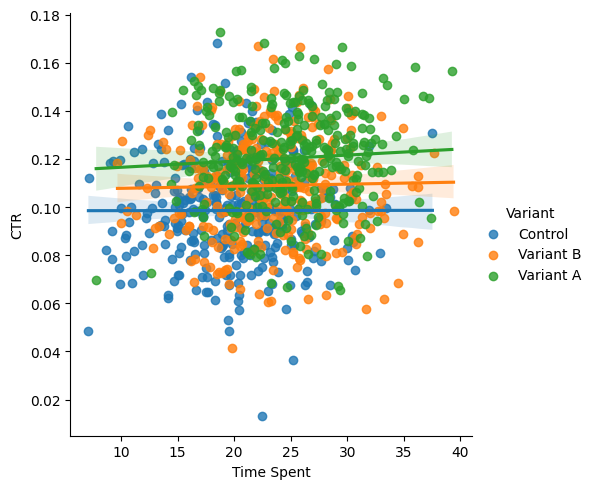

In [54]:
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Variant')

In [55]:
#Conducting z-test to see if that impacts the hypotheses
CTR_A = df[df['Variant'] == 'Variant A']['CTR']
CTR_B = df[df['Variant'] == 'Variant B']['CTR']
CTR_C = df[df['Variant'] == 'Control']['CTR']

statistic, p_valA = sm_proportion.proportions_ztest([CTR_A.sum(), CTR_C.sum()],[len(CTR_A), len(CTR_C)])

print(f"P-value A: {p_valA}")

statistic, p_valB = sm_proportion.proportions_ztest([CTR_B.sum(), CTR_C.sum()],[len(CTR_B), len(CTR_C)])

print(f"P-value B: {p_valB}")

P-value A: 0.36768468316739134
P-value B: 0.659493822517278


In [57]:
#Conducting test to see how location performs across Variant A
Timespent_A = df[df['Variant'] == 'Variant A']['Time Spent']
Timespent_A_location_1 = df[(df['Variant'] == 'Variant A') & (df['Location'] == 'Location1')]['Time Spent']
Timespent_A_location_2 = df[(df['Variant'] == 'Variant A') & (df['Location'] == 'Location2')]['Time Spent']
Timespent_A_location_3 = df[(df['Variant'] == 'Variant A') & (df['Location'] == 'Location3')]['Time Spent']

t_statA_location_A, p_valA_location_1 = stats.ttest_ind(Timespent_A_location_1, Timespent_A)
t_statA_location_B, p_valA_location_2 = stats.ttest_ind(Timespent_A_location_2, Timespent_A)
t_statA_location_C, p_valA_location_3 = stats.ttest_ind(Timespent_A_location_3, Timespent_A)

print(f"P-value A (Location A): {p_valA_location_1}")
print(f"P-value A (Location B): {p_valA_location_2}")
print(f"P-value A (Location C): {p_valA_location_3}")

P-value A (Location A): 0.8997486126132964
P-value A (Location B): 0.8492052106792263
P-value A (Location C): 0.7365889866711038


1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

    Based on the average Time Spent and average CTR of control, A and B; it looks like Variant A has slightly higher lift wrt Control as compared to Variant B. This is not a significant difference, and is not conclusive enough to choose A over B, other factors must be considered using statistical testing.

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

    Tests conducted to calculate p-value: Z-Test and T-test.

    A few null hypotheses were considered:

        1.Mean Time Spent is similar across all locations

        2.Mean CTR is similar across all locations

        3.Mean Time Spent is similar across all devices
        
        4.Mean CTR is similar across all devices
    However, due to the Fstat value being close to 0 and p value>0.05, the null hypothesis can not be rejected, and hence evaluating on Variants is not affected by location or device

    Minimum age 18 to maximum age 64 were grouped, and null hypothesis that the mean CTR or Time Spent would vary across ages was considered. However, similar results were observed for different age groups too.

    Now, we can test only on Variants, based on CTR and Time Spent.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

    Based on the statistical testing,

    1. The results indicate that there are significant differences in "Time Spent" between each variant (A and B) and the Control group. The p-values for Variant A and Variant B compared to the Control group are extremely low.
    
    2. Same results were observed for CTR.

    Both Variant A and B showed statistical difference from the Control, and have a higher mean as compared to the Control. We also compared  A and B to see if there is a statistical difference, and based on low P-value, there is a difference.

    Now, in both CTR and Time Spent, A had a lower p-value when compared with Control (even though by a margin when compared to B and Control), and a higher mean across both variables.

    Solely based on the current data, conclusion can be drawn that Variant A is the better of the 2 and can be deployed.

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

    If we plan to go ahead with Variant A, we need to see the results against other factors as well- organization goals, interface changes etc.
    Testing similar to the one done for comparing locations with Variant A, need to be done (this one shows no significant difference between locations, so maybe external factors need to be considered)

    Since the data given to check for the experiment was limited, tests can be conducted on the larger data set to confirm that Variant A is indeed performing better.

    The recommendation would be to do a gradual rollout considering Variant B was not far behind in terms of performance, so external factors might be in play. This helps to mitigate risk and collect feedback.

    This feedback can be used to make iterative changes to make Variant A perform even better, ensuring it is meeting user expectations, and has an impact on conversion rates.

    Once the iterative process is complete, then Variant A can be rolled out fully to all users.